In [1]:
!pip3 install torch
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\sheik\Documents\College\Sem4\Cousrera\Course 3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\sheik\Documents\College\Sem4\Cousrera\Course 3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\sheik\Documents\College\Sem4\Cousrera\Course 3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\sheik\Documents\College\Sem4\Cousrera\Course 3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sheik\Documents\College\Sem4\Cousrera\Course 3\Lib\http\client.py", line 479, in read
    s = self.fp

  Using cached torch-2.9.1-cp312-cp312-win_amd64.whl.metadata (30 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/110.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/110.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/110.9 MB 453.5 kB/s eta 0:04:04
   ---------------------------------------- 0.5/110.9 MB 453.5 kB/s eta 0:04:04
   ---------------------------------------- 0.5/110.9 MB 453.5 kB/s e

ModuleNotFoundError: No module named 'torch'

Note : Use the drive link for the processed dataset

In [ ]:
!pip3 install face_recognition

In [ ]:
#THis code is to check if the video is corrupted or not..
#If the video is corrupted delete the video.
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

video_fil = glob.glob('/content/drive/My Drive/content/drive/DFDC_FAKE_Face_only_data/*.mp4')
video_fil += glob.glob('/content/drive/My Drive/content/drive/DFDC_REAL_Face_only_data/*.mp4')

print("Total no of videos :" , len(video_fil))
print(video_fil)
count = 0
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video_fil) - count))

RuntimeError: Error while calling cudaGetDevice(&the_device_id) in file /root/.cache/uv/sdists-v9/pypi/dlib/19.24.6/88hSbAt9xoNdWZQMqWsaC/src/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version

In [ ]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files = glob.glob('/content/drive/My Drive/content/drive/DFDC_FAKE_Face_only_data/*.mp4')
video_files += glob.glob('/content/drive/My Drive/content/drive/DFDC_REAL_Face_only_data/*.mp4')
random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

In [ ]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self, video_names, labels, sequence_length=60, transform=None):
        self.video_names = video_names             # list of video paths
        self.labels = labels                       # pandas DataFrame
        self.transform = transform
        self.count = sequence_length

    def __len__(self):
        return len(self.video_names)

    def __getitem__(self, idx):

        # Fix: idx may be a Tensor → convert to int
        if isinstance(idx, torch.Tensor):
            idx = idx.item()

        video_path = self.video_names[idx]
        frames = []

        temp_video = video_path.split('/')[-1]     # filename only

        # Fix: use self.labels, not labels
        row_index = self.labels.loc[self.labels["file"] == temp_video].index.values[0]
        label = self.labels.iloc[row_index, 1]

        # Convert text label to int
        if label == 'FAKE':
            label = 0
        elif label == 'REAL':
            label = 1
        else:
            raise ValueError(f"Unknown label: {label}")

        # Extract frames
        for frame in self.frame_extract(video_path):
            if self.transform is not None:
                frame = self.transform(frame)
            frames.append(frame)
            if len(frames) == self.count:
                break

        # Not enough frames → pad with last frame
        if len(frames) == 0:
            raise RuntimeError(f"No frames read from {video_path}")
        while len(frames) < self.count:
            frames.append(frames[-1])

        frames = torch.stack(frames)

        return frames, label

    def frame_extract(self, path):
        vidObj = cv2.VideoCapture(path)
        success = True
        while success:
            success, image = vidObj.read()
            if success:
                yield image

#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [ ]:
#count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv('/content/drive/My Drive/content/drive/Gobal_metadata.csv',names=header_list)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('/')[-1]
    label = lab.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake+=1
    if(label == 'REAL'):
      real+=1
  return real,fake

In [ ]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

header_list = ["file","label"]
labels = pd.read_csv('/content/drive/My Drive/content/drive/Gobal_metadata.csv',names=header_list)
#print(labels)
train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
# filenames found in labels (normalized)

label_files = set(f.strip().lower() for f in labels['file'].astype(str).tolist())
train_videos = [v for v in train_videos if v.split('/')[-1] != 'alrtntfxtd (1).mp4']
train_videos = [v for v in train_videos if v.split('/')[-1] != 'avlmlshqjh (1).mp4']
# valid_videos = [v for v in valid_videos if v.split('/')[-1] != 'avlmlshqjh (1).mp4']
missing = []
for p in train_videos:
    fname = p.split('/')[-1].strip().lower()
    if fname not in label_files:
        missing.append(fname)

print("Total train videos:", len(train_videos))
print("Missing from labels:", len(missing))
print("Examples of missing:", missing[:20])

# train_videos,valid_videos = train_test_split(data,test_size = 0.2)
# print(train_videos)

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 2)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 2)
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [ ]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [ ]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

In [ ]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'/content/checkpoint.pt')
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [ ]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [ ]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [ ]:
import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-5#0.001
#number of epochs
num_epochs = 5

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)
torch.save(model.state_dict(), "last_epoch_model.pth")
print("✔ Saved last epoch model as last_epoch_model.pth")

Upload your video (.mp4, .avi, etc.)


Saving 14560847_2160_3840_30fps.mp4 to 14560847_2160_3840_30fps (4).mp4
Using video: 14560847_2160_3840_30fps (4).mp4
Loading trained model...
Loaded: final_model.pth
Extracting frames...
Prediction: FAKE Confidence: 0.0


/tmp/ipython-input-3465762122.py:103: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  if hasattr(fmap, "grad") and fmap.grad is not None:
/tmp/ipython-input-3465762122.py:148: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor inst

Saving suspicious frames only (no output video) ...
No suspicious frames detected.


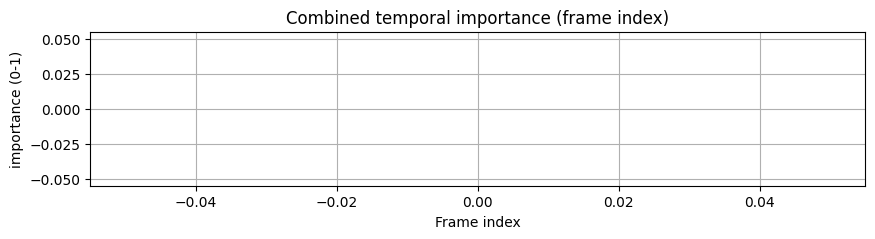

Prediction: FAKE (0.00%)


In [ ]:
# === Forgery localization (Spatial + Temporal) with confidence overlay (Top-left) ===
# Paste this cell AFTER your Model class definition.
# Expects best_model.pth in notebook working directory.
# Requires: torch, torchvision, numpy, cv2, matplotlib, tqdm

import os, cv2, copy, time
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename
import torch
torch.backends.cudnn.enabled = False
# ---------- Config ----------
SEQ_LEN = 20
FRAME_SIZE = (112, 112)        # (W, H)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
VIDEO_OUTPUT = "forgery_localized_output_with_confidence.mp4"
TEMPORAL_BORDER_THRESHOLD = 0.4
OCCLUSION_MODE = True
# ----------------------------

# ---------- Utilities ----------
def select_video_via_dialog():
    print("Select video file...")
    path = askopenfilename(title="Select a video")
    if path == '':
        raise FileNotFoundError("No file selected.")
    return path

def extract_frames(video_path, seq_len=SEQ_LEN, resize=FRAME_SIZE):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while len(frames) < seq_len:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, resize)
        frames.append(frame)
    cap.release()
    if len(frames) == 0:
        raise ValueError("No frames extracted from video.")
    while len(frames) < seq_len:
        frames.append(frames[-1].copy())
    frames = np.stack(frames[:seq_len], axis=0)
    return frames

def preprocess_frames(frames):
    arr = frames.astype(np.float32) / 255.0
    mean = np.array([0.485, 0.456, 0.406]).reshape(1,1,1,3)
    std  = np.array([0.229, 0.224, 0.225]).reshape(1,1,1,3)
    arr = (arr - mean) / std
    t = torch.tensor(arr).permute(0,3,1,2).unsqueeze(0)  # (1, seq_len, 3, H, W)
    return t.float()

def overlay_heatmap_rgb(frame_rgb, cam_map, alpha=0.45):
    heat = cv2.applyColorMap((cam_map*255).astype(np.uint8), cv2.COLORMAP_JET)
    heat = cv2.cvtColor(heat, cv2.COLOR_BGR2RGB)
    overlay = (frame_rgb.astype(np.float32)*(1-alpha) + heat.astype(np.float32)*alpha)
    overlay = np.clip(overlay, 0, 255).astype(np.uint8)
    return overlay

def draw_border_and_label(frame_rgb, label_text, color=(255,0,0), thickness=4):
    h,w = frame_rgb.shape[:2]
    bgr = (int(color[2]), int(color[1]), int(color[0]))
    frame_bgr = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)
    cv2.rectangle(frame_bgr, (0,0), (w-1,h-1), bgr, thickness)
    # put label top-left, small
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame_bgr, label_text, (8, 26), font, 0.7, bgr, 2, cv2.LINE_AA)
    return cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)

# ---------- Hooks & Grad-CAM ----------
class ActGrad:
    def __init__(self):
        self.activations = None
        self.gradients = None
    def forward_hook(self, module, inp, out):
        self.activations = out
    def backward_hook(self, grad):
        self.gradients = grad

def register_forward_hook(model):
    ag = ActGrad()
    handle = model.model.register_forward_hook(lambda m, i, o: ag.forward_hook(m,i,o))
    return ag, handle

def compute_gradcam_for_sequence(model, input_tensor, class_idx=None):
    model.zero_grad()
    ag, handle = register_forward_hook(model)
    input_tensor = input_tensor.to(DEVICE)
    input_tensor.requires_grad = True
    fmap, logits = model(input_tensor)  # fmap: (batch*seq_len, C, Hf, Wf)
    if class_idx is None:
        class_idx = torch.argmax(logits, dim=1).item()
    score = logits[0, class_idx]
    score.backward(retain_graph=True)
    # fetch activations and gradients
    acts = ag.activations if ag.activations is not None else fmap.detach()
    grads = None
    # sometimes grads saved on fmap.grad
    if hasattr(fmap, "grad") and fmap.grad is not None:
        grads = fmap.grad.detach()
    else:
        # try to get gradients by autograd on acts (if available)
        try:
            grads = torch.autograd.grad(score, acts, retain_graph=True, allow_unused=True)[0]
        except Exception:
            pass
    if grads is None:
        raise RuntimeError("Unable to capture gradients for Grad-CAM. Ensure model & DEVICE match and input requires_grad.")
    acts_np = acts.detach().cpu().numpy()
    grads_np = grads.detach().cpu().numpy()
    weights = np.mean(grads_np, axis=(2,3))  # (batch*seq_len, C)
    cams = []
    for i in range(acts_np.shape[0]):
        cam = np.zeros((acts_np.shape[2], acts_np.shape[3]), dtype=np.float32)
        for c in range(acts_np.shape[1]):
            cam += weights[i, c] * acts_np[i, c]
        cam = np.maximum(cam, 0)
        if cam.max() != 0:
            cam = (cam - cam.min()) / (cam.max() + 1e-8)
        cams.append(cam)
    cams = np.stack(cams, axis=0)
    cams_resized = np.zeros((cams.shape[0], FRAME_SIZE[1], FRAME_SIZE[0]), dtype=np.float32)
    for i in range(cams.shape[0]):
        cams_resized[i] = cv2.resize(cams[i], FRAME_SIZE)
    handle.remove()
    return cams_resized

# ---------- Temporal attribution ----------
def temporal_gradients(model, input_tensor, class_idx=None):
    model.zero_grad()
    ag, handle = register_forward_hook(model)
    input_tensor = input_tensor.to(DEVICE)
    input_tensor.requires_grad = True
    fmap, logits = model(input_tensor)
    if class_idx is None:
        class_idx = torch.argmax(logits, dim=1).item()
    score = logits[0, class_idx]
    score.backward(retain_graph=True)
    acts = ag.activations
    grads = None
    # try to get grads directly
    if acts is None:
        raise RuntimeError("Could not capture activations for temporal gradient.")
    grads = acts.grad if hasattr(acts, "grad") and acts.grad is not None else None
    if grads is None:
        try:
            grads = torch.autograd.grad(score, acts, retain_graph=True, allow_unused=True)[0]
        except Exception:
            pass
    if grads is None:
        raise RuntimeError("Unable to compute temporal gradients.")
    pooled = F.adaptive_avg_pool2d(acts, (1,1)).squeeze(-1).squeeze(-1)   # (batch*seq_len, C)
    grads_pooled = torch.mean(grads, dim=(2,3))
    imp = torch.norm(grads_pooled, dim=1).cpu().numpy()
    seq_len = input_tensor.shape[1]
    if imp.size != seq_len:
        imp = imp[:seq_len]
    imp = (imp - imp.min()) / (imp.max() - imp.min() + 1e-8)
    handle.remove()
    return imp

def temporal_occlusion_importance(model, input_tensor, class_idx=None):
    model.eval()
    input_tensor = input_tensor.to(DEVICE)
    with torch.no_grad():
        _, logits_orig = model(input_tensor)
        if class_idx is None:
            class_idx = torch.argmax(logits_orig, dim=1).item()
        base_score = F.softmax(logits_orig, dim=1)[0, class_idx].item()
    seq_len = input_tensor.shape[1]
    drops = []
    for t in range(seq_len):
        modified = input_tensor.clone()
        modified[0, t] = 0.0
        with torch.no_grad():
            _, logits = model(modified)
            score = F.softmax(logits, dim=1)[0, class_idx].item()
        drops.append(max(0.0, base_score - score))
    drops = np.array(drops)
    if drops.max() > 0:
        drops = drops / (drops.max() + 1e-8)
    return drops

def combined_temporal_score(grad_imp, occ_imp, alpha=0.7):
    if occ_imp is None:
        return grad_imp
    assert len(grad_imp) == len(occ_imp)
    combined = alpha * grad_imp + (1 - alpha) * occ_imp
    if combined.max() > 0:
        combined = (combined - combined.min()) / (combined.max() - combined.min() + 1e-8)
    return combined

# ---------- Main pipeline ----------
def run_forgery_localization_pipeline(video_path, weights_path="final_model.pth"):
    print("Loading trained model...")
    model = Model(num_classes=2).to(DEVICE)
    model.load_state_dict(torch.load("final_model.pth", map_location=DEVICE))
    model.eval()
    print("Loaded:", weights_path)

    print("Extracting frames...")
    frames = extract_frames(video_path, seq_len=SEQ_LEN, resize=FRAME_SIZE)  # (seq_len, H, W, 3)
    input_tensor = preprocess_frames(frames).to(DEVICE)  # (1, seq_len, 3, H, W)

    # forward once for prediction & confidence
    with torch.no_grad():
     fmap, logits = model(input_tensor)
     probs = F.softmax(logits, dim=1)[0]

# FIX 2: Avoid NaN
    if torch.isnan(probs).any():
        print("Warning: NaN in probabilities → forcing zeros")
        probs = torch.where(torch.isnan(probs), torch.zeros_like(probs), probs)

    # Always move to CPU + numpy AFTER fixing NaN
    probs = probs.cpu().numpy()

    # Compute prediction & confidence
    pred_class = int(np.argmax(probs))
    label_text = "FAKE" if pred_class == 0 else "REAL"
    conf = probs[pred_class]  # in [0,1]

    print("Prediction:", label_text, "Confidence:", conf)


    # Spatial Grad-CAM
    try:
        cams = compute_gradcam_for_sequence(model, input_tensor, class_idx=None)
    except Exception as e:
        print("Grad-CAM failed:", e)
        cams = np.zeros((SEQ_LEN, FRAME_SIZE[1], FRAME_SIZE[0]), dtype=np.float32)

    # Temporal
    try:
        grad_imp = temporal_gradients(model, input_tensor, class_idx=None)
    except Exception as e:
        print("Temporal gradient failed:", e)
        grad_imp = np.zeros(SEQ_LEN, dtype=np.float32)

    occ_imp = None
    if OCCLUSION_MODE:
        try:
            occ_imp = temporal_occlusion_importance(model, input_tensor, class_idx=None)
        except Exception as e:
            print("Occlusion failed:", e)
            occ_imp = None

    combined = combined_temporal_score(grad_imp, occ_imp, alpha=0.7)
    suspicious_flags = combined >= TEMPORAL_BORDER_THRESHOLD

    # Create annotated frames with confidence (top-left)
    annotated_frames = []
    for i in range(SEQ_LEN):
        orig = frames[i].copy()  # RGB uint8
        cam = cams[i] if i < cams.shape[0] else np.zeros((FRAME_SIZE[1], FRAME_SIZE[0]), dtype=np.float32)
        overlay = overlay_heatmap_rgb(orig, cam, alpha=0.45)

        # Add small bottom bar showing temporal map
        bar_h = 8
        overlay_padded = np.pad(overlay, ((0, bar_h),(0,0),(0,0)), mode='constant', constant_values=0)
        W = overlay_padded.shape[1]
        for t_idx in range(SEQ_LEN):
            x0 = int(W * (t_idx / SEQ_LEN))
            x1 = int(W * ((t_idx + 1)/SEQ_LEN))
            val = combined[t_idx]
            if val < 0.33:
                col = (0,200,0)
            elif val < 0.66:
                col = (200,200,0)
            else:
                col = (200,0,0)
            cv2.rectangle(overlay_padded, (x0, overlay.shape[0]), (x1, overlay.shape[0]+bar_h), col, -1)
        # mark current frame index
        cur_x0 = int(W * (i/SEQ_LEN))
        cv2.rectangle(overlay_padded, (cur_x0, overlay.shape[0]), (cur_x0+2, overlay.shape[0]+bar_h), (255,255,255), -1)
        overlay = overlay_padded

        # Add confidence and labels at TOP-LEFT (location A)
        conf_text = f"{label_text} ({conf*100:.2f}%)"
        temp_text = f"TempScore: {combined[i]:.2f}"
        frame_text = f"Frame {i+1}/{SEQ_LEN}"

        # draw a semi-transparent rectangle background for readability
        h_txt = 70
        overlay[:h_txt, :260] = (overlay[:h_txt, :260] * 0.4 + 30)  # darken slightly
        # put texts (white)
        cv2.putText(overlay, conf_text, (8, 22), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255,255,255), 2, cv2.LINE_AA)
        cv2.putText(overlay, temp_text, (8, 45), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (255,255,255), 1, cv2.LINE_AA)
        cv2.putText(overlay, frame_text, (8, 64), cv2.FONT_HERSHEY_SIMPLEX, 0.50, (255,255,255), 1, cv2.LINE_AA)

        if suspicious_flags[i]:
            overlay = draw_border_and_label(overlay, "SUSPICIOUS", color=(255,0,0), thickness=6)

        annotated_frames.append(overlay)

    # Save video
    print("Saving suspicious frames only (no output video) ...")

    suspicious_count = 0

    for i in range(SEQ_LEN):
      if suspicious_flags[i]:
        suspicious_count += 1
        save_path = f"suspicious_frame_{i+1}.png"
        cv2.imwrite(save_path, cv2.cvtColor(annotated_frames[i], cv2.COLOR_RGB2BGR))
        print(f"Saved: {save_path}")

    if suspicious_count == 0:
      print("No suspicious frames detected.")
    else:
      print(f"Total suspicious frames saved: {suspicious_count}")

    # Plot combined temporal importance inline
    try:
        plt.figure(figsize=(10,2))
        plt.plot(combined, marker='o')
        plt.title("Combined temporal importance (frame index)")
        plt.xlabel("Frame index")
        plt.ylabel("importance (0-1)")
        plt.grid(True)
        plt.show()
    except Exception:
        pass

    return {
        "prediction_class": pred_class,
        "probabilities": probs,
        "confidence": conf,
        "gradcam_maps": cams,
        "grad_imp": grad_imp,
        "occ_imp": occ_imp,
        "combined_temporal": combined,
        "suspicious_flags": suspicious_flags,
        "output_path": VIDEO_OUTPUT
    }

# === Run the pipeline ===
from google.colab import files

print("Upload your video (.mp4, .avi, etc.)")
uploaded = files.upload()

video_path = list(uploaded.keys())[0]
print("Using video:", video_path)
results = run_forgery_localization_pipeline(video_path)
print("Prediction:", "FAKE" if results["prediction_class"]==0 else "REAL", f"({results['confidence']*100:.2f}%)")


In [ ]:
# Test forward on a simple dummy tensor
dummy = torch.randn(1, 20, 3, 112, 112).to(DEVICE)

model = Model(num_classes=2).to(DEVICE)
model.load_state_dict(torch.load("final_model.pth", map_location=DEVICE))
model.eval()

with torch.no_grad():
    fmap, logits = model(dummy)
    print("LOGITS =", logits)
    print("NAN =", torch.isnan(logits).any())


LOGITS = tensor([[nan, nan]], device='cuda:0')
NAN = tensor(True, device='cuda:0')


In [ ]:
import torch, numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model(num_classes=2).to(device)
model.load_state_dict(torch.load("final_model.pth", map_location=device))
model.eval()

# 1. check params in checkpoint for NaN / Inf
sd = torch.load("best_model.pth", map_location="cpu")
for k,v in sd.items():
    arr = v
    if torch.is_tensor(arr):
        arr = arr.numpy()
    if np.isnan(arr).any() or np.isinf(arr).any():
        print("CHECKPOINT BAD PARAM:", k, "has NaN/Inf")
        break
else:
    print("Checkpoint params OK (no NaN/Inf)")

# 2. check a real video batch input (or dummy) for NaN
# if you have a video_path variable, use extract_frames() from your notebook; else use dummy
try:
    frames = extract_frames(video_path, seq_len=20, resize=(112,112))  # uses your function
    print("Extracted frames:", frames.shape, "min/max", frames.min(), frames.max())
except Exception as e:
    print("Could not extract real frames, using dummy:", e)
    frames = (np.random.rand(20,112,112,3)*255).astype(np.uint8)

# convert to input tensor same as inference
inp = preprocess_frames(frames).to(device)   # your preprocess_frames normalizes
print("Input tensor: nan?", torch.isnan(inp).any(), "inf?", torch.isinf(inp).any())
with torch.no_grad():
    # forward step-by-step
    # 2. CNN forward on per-frame input (model.model expects batch*seq,3,H,W)
    b, s, c, h, w = inp.shape
    inp_frames = inp.view(b*s, c, h, w)  # (batch*seq, 3, H, W)
    # pass through backbone
    backbone = model.model  # the torchvision sequential returned earlier
    # run through blocks sequentially and inspect
    x = inp_frames
    for i, module in enumerate(backbone):
        x = module(x)
        if torch.isnan(x).any() or torch.isinf(x).any():
            print(f"NaN after backbone module index {i} ({module.__class__.__name__})")
            break
    else:
        print("Backbone OK. fmap shape:", x.shape, "min/max:", x.min().item(), x.max().item())

    # 3. avgpool + reshape to (batch, seq, 2048)
    try:
        x_pool = model.avgpool(x)     # (batch*seq, C, 1, 1)
        x_pool = x_pool.view(b, s, -1)
        print("Pooled features OK. shape:", x_pool.shape, "nan?", torch.isnan(x_pool).any())
    except Exception as e:
        print("Pooling/reshape error:", e)

    # 4. LSTM forward (use same code as model forward but step)
    try:
        # detach hidden states; call LSTM directly
        lstm = model.lstm
        # PyTorch LSTM expects (seq, batch, feature) if batch_first=False; your model used default so be careful
        # The notebook used: x_lstm,_ = self.lstm(x,None)
        # so it passed (batch, seq, feature) -> you created LSTM without batch_first, that could be an issue.
        # We'll try both shapes to test
        x_for_lstm = x_pool.permute(1,0,2)  # (seq, batch, feat)
        o, h = lstm(x_for_lstm)             # If LSTM initialized to expect seq-first, this should work
        print("LSTM output shape:", o.shape, "nan?", torch.isnan(o).any())
    except Exception as e:
        print("LSTM forward error:", e)


CHECKPOINT BAD PARAM: model.1.running_mean has NaN/Inf
Extracted frames: (20, 112, 112, 3) min/max 0 255
Input tensor: nan? tensor(False, device='cuda:0') inf? tensor(False, device='cuda:0')
NaN after backbone module index 1 (BatchNorm2d)
Pooled features OK. shape: torch.Size([1, 20, 64]) nan? tensor(True, device='cuda:0')
LSTM forward error: input.size(-1) must be equal to input_size. Expected 2048, got 64


Using video: ./video1.mp4
Loading trained model...
Loaded: last_epoch_model.pth
Extracting frames...
Prediction: FAKE Confidence: 0.80933225


C:\Users\sheik\AppData\Local\Temp\ipykernel_28600\1543709643.py:129: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  if hasattr(fmap, "grad") and fmap.grad is not None:
C:\Users\sheik\AppData\Local\Temp\ipykernel_28600\1543709643.py:174: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-

Saving suspicious frames only (no output video) ...
Saved: suspicious_frame_1.png
Saved: suspicious_frame_2.png
Saved: suspicious_frame_4.png
Saved: suspicious_frame_5.png
Saved: suspicious_frame_6.png
Saved: suspicious_frame_7.png
Saved: suspicious_frame_8.png
Saved: suspicious_frame_9.png
Saved: suspicious_frame_10.png
Saved: suspicious_frame_12.png
Saved: suspicious_frame_13.png
Saved: suspicious_frame_14.png
Saved: suspicious_frame_15.png
Saved: suspicious_frame_16.png
Saved: suspicious_frame_17.png
Saved: suspicious_frame_18.png
Saved: suspicious_frame_19.png
Saved: suspicious_frame_20.png
Total suspicious frames saved: 18


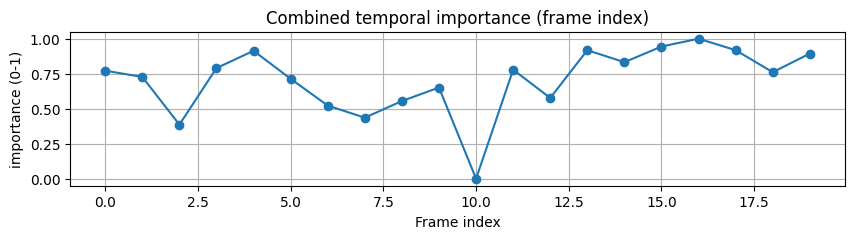

Prediction: FAKE (80.93%)


In [4]:
# === Forgery localization (Spatial + Temporal) with confidence overlay (Top-left) ===
# Paste this cell AFTER your Model class definition.
# Expects best_model.pth in notebook working directory.
# Requires: torch, torchvision, numpy, cv2, matplotlib, tqdm

import os, cv2, copy, time
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename
import torch
torch.backends.cudnn.enabled = False


#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))
# model = Model(2).cuda()
# a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

# ---------- Config ----------
SEQ_LEN = 20
FRAME_SIZE = (112, 112)        # (W, H)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
VIDEO_OUTPUT = "forgery_localized_output_with_confidence.mp4"
TEMPORAL_BORDER_THRESHOLD = 0.4
OCCLUSION_MODE = True
# ----------------------------

# ---------- Utilities ----------
def select_video_via_dialog():
    print("Select video file...")
    path = askopenfilename(title="Select a video")
    if path == '':
        raise FileNotFoundError("No file selected.")
    return path

def extract_frames(video_path, seq_len=SEQ_LEN, resize=FRAME_SIZE):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while len(frames) < seq_len:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, resize)
        frames.append(frame)
    cap.release()
    if len(frames) == 0:
        raise ValueError("No frames extracted from video.")
    while len(frames) < seq_len:
        frames.append(frames[-1].copy())
    frames = np.stack(frames[:seq_len], axis=0)
    return frames

def preprocess_frames(frames):
    arr = frames.astype(np.float32) / 255.0
    mean = np.array([0.485, 0.456, 0.406]).reshape(1,1,1,3)
    std  = np.array([0.229, 0.224, 0.225]).reshape(1,1,1,3)
    arr = (arr - mean) / std
    t = torch.tensor(arr).permute(0,3,1,2).unsqueeze(0)  # (1, seq_len, 3, H, W)
    return t.float()

def overlay_heatmap_rgb(frame_rgb, cam_map, alpha=0.45):
    heat = cv2.applyColorMap((cam_map*255).astype(np.uint8), cv2.COLORMAP_JET)
    heat = cv2.cvtColor(heat, cv2.COLOR_BGR2RGB)
    overlay = (frame_rgb.astype(np.float32)*(1-alpha) + heat.astype(np.float32)*alpha)
    overlay = np.clip(overlay, 0, 255).astype(np.uint8)
    return overlay

def draw_border_and_label(frame_rgb, label_text, color=(255,0,0), thickness=4):
    h,w = frame_rgb.shape[:2]
    bgr = (int(color[2]), int(color[1]), int(color[0]))
    frame_bgr = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)
    cv2.rectangle(frame_bgr, (0,0), (w-1,h-1), bgr, thickness)
    # put label top-left, small
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame_bgr, label_text, (8, 26), font, 0.7, bgr, 2, cv2.LINE_AA)
    return cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)

# ---------- Hooks & Grad-CAM ----------
class ActGrad:
    def __init__(self):
        self.activations = None
        self.gradients = None
    def forward_hook(self, module, inp, out):
        self.activations = out
    def backward_hook(self, grad):
        self.gradients = grad

def register_forward_hook(model):
    ag = ActGrad()
    handle = model.model.register_forward_hook(lambda m, i, o: ag.forward_hook(m,i,o))
    return ag, handle

def compute_gradcam_for_sequence(model, input_tensor, class_idx=None):
    model.zero_grad()
    ag, handle = register_forward_hook(model)
    input_tensor = input_tensor.to(DEVICE)
    input_tensor.requires_grad = True
    fmap, logits = model(input_tensor)  # fmap: (batch*seq_len, C, Hf, Wf)
    if class_idx is None:
        class_idx = torch.argmax(logits, dim=1).item()
    score = logits[0, class_idx]
    score.backward(retain_graph=True)
    # fetch activations and gradients
    acts = ag.activations if ag.activations is not None else fmap.detach()
    grads = None
    # sometimes grads saved on fmap.grad
    if hasattr(fmap, "grad") and fmap.grad is not None:
        grads = fmap.grad.detach()
    else:
        # try to get gradients by autograd on acts (if available)
        try:
            grads = torch.autograd.grad(score, acts, retain_graph=True, allow_unused=True)[0]
        except Exception:
            pass
    if grads is None:
        raise RuntimeError("Unable to capture gradients for Grad-CAM. Ensure model & DEVICE match and input requires_grad.")
    acts_np = acts.detach().cpu().numpy()
    grads_np = grads.detach().cpu().numpy()
    weights = np.mean(grads_np, axis=(2,3))  # (batch*seq_len, C)
    cams = []
    for i in range(acts_np.shape[0]):
        cam = np.zeros((acts_np.shape[2], acts_np.shape[3]), dtype=np.float32)
        for c in range(acts_np.shape[1]):
            cam += weights[i, c] * acts_np[i, c]
        cam = np.maximum(cam, 0)
        if cam.max() != 0:
            cam = (cam - cam.min()) / (cam.max() + 1e-8)
        cams.append(cam)
    cams = np.stack(cams, axis=0)
    cams_resized = np.zeros((cams.shape[0], FRAME_SIZE[1], FRAME_SIZE[0]), dtype=np.float32)
    for i in range(cams.shape[0]):
        cams_resized[i] = cv2.resize(cams[i], FRAME_SIZE)
    handle.remove()
    return cams_resized

# ---------- Temporal attribution ----------
def temporal_gradients(model, input_tensor, class_idx=None):
    model.zero_grad()
    ag, handle = register_forward_hook(model)
    input_tensor = input_tensor.to(DEVICE)
    input_tensor.requires_grad = True
    fmap, logits = model(input_tensor)
    if class_idx is None:
        class_idx = torch.argmax(logits, dim=1).item()
    score = logits[0, class_idx]
    score.backward(retain_graph=True)
    acts = ag.activations
    grads = None
    # try to get grads directly
    if acts is None:
        raise RuntimeError("Could not capture activations for temporal gradient.")
    grads = acts.grad if hasattr(acts, "grad") and acts.grad is not None else None
    if grads is None:
        try:
            grads = torch.autograd.grad(score, acts, retain_graph=True, allow_unused=True)[0]
        except Exception:
            pass
    if grads is None:
        raise RuntimeError("Unable to compute temporal gradients.")
    pooled = F.adaptive_avg_pool2d(acts, (1,1)).squeeze(-1).squeeze(-1)   # (batch*seq_len, C)
    grads_pooled = torch.mean(grads, dim=(2,3))
    imp = torch.norm(grads_pooled, dim=1).cpu().numpy()
    seq_len = input_tensor.shape[1]
    if imp.size != seq_len:
        imp = imp[:seq_len]
    imp = (imp - imp.min()) / (imp.max() - imp.min() + 1e-8)
    handle.remove()
    return imp

def temporal_occlusion_importance(model, input_tensor, class_idx=None):
    model.eval()
    input_tensor = input_tensor.to(DEVICE)
    with torch.no_grad():
        _, logits_orig = model(input_tensor)
        if class_idx is None:
            class_idx = torch.argmax(logits_orig, dim=1).item()
        base_score = F.softmax(logits_orig, dim=1)[0, class_idx].item()
    seq_len = input_tensor.shape[1]
    drops = []
    for t in range(seq_len):
        modified = input_tensor.clone()
        modified[0, t] = 0.0
        with torch.no_grad():
            _, logits = model(modified)
            score = F.softmax(logits, dim=1)[0, class_idx].item()
        drops.append(max(0.0, base_score - score))
    drops = np.array(drops)
    if drops.max() > 0:
        drops = drops / (drops.max() + 1e-8)
    return drops

def combined_temporal_score(grad_imp, occ_imp, alpha=0.7):
    if occ_imp is None:
        return grad_imp
    assert len(grad_imp) == len(occ_imp)
    combined = alpha * grad_imp + (1 - alpha) * occ_imp
    if combined.max() > 0:
        combined = (combined - combined.min()) / (combined.max() - combined.min() + 1e-8)
    return combined

# ---------- Main pipeline ----------
def run_forgery_localization_pipeline(video_path, weights_path="last_epoch_model.pth"):
    print("Loading trained model...")
    model = Model(num_classes=2).to(DEVICE)
    model.load_state_dict(torch.load("last_epoch_model.pth", map_location=DEVICE))
    model.eval()
    print("Loaded:", weights_path)

    print("Extracting frames...")
    frames = extract_frames(video_path, seq_len=SEQ_LEN, resize=FRAME_SIZE)  # (seq_len, H, W, 3)
    input_tensor = preprocess_frames(frames).to(DEVICE)  # (1, seq_len, 3, H, W)

    # forward once for prediction & confidence
    with torch.no_grad():
     fmap, logits = model(input_tensor)
     probs = F.softmax(logits, dim=1)[0]

# FIX 2: Avoid NaN
    if torch.isnan(probs).any():
        print("Warning: NaN in probabilities → forcing zeros")
        probs = torch.where(torch.isnan(probs), torch.zeros_like(probs), probs)

    # Always move to CPU + numpy AFTER fixing NaN
    probs = probs.cpu().numpy()

    # Compute prediction & confidence
    pred_class = int(np.argmax(probs))
    label_text = "FAKE" if pred_class == 0 else "REAL"
    conf = probs[pred_class]  # in [0,1]

    print("Prediction:", label_text, "Confidence:", conf)


    # Spatial Grad-CAM
    try:
        cams = compute_gradcam_for_sequence(model, input_tensor, class_idx=None)
    except Exception as e:
        print("Grad-CAM failed:", e)
        cams = np.zeros((SEQ_LEN, FRAME_SIZE[1], FRAME_SIZE[0]), dtype=np.float32)

    # Temporal
    try:
        grad_imp = temporal_gradients(model, input_tensor, class_idx=None)
    except Exception as e:
        print("Temporal gradient failed:", e)
        grad_imp = np.zeros(SEQ_LEN, dtype=np.float32)

    occ_imp = None
    if OCCLUSION_MODE:
        try:
            occ_imp = temporal_occlusion_importance(model, input_tensor, class_idx=None)
        except Exception as e:
            print("Occlusion failed:", e)
            occ_imp = None

    combined = combined_temporal_score(grad_imp, occ_imp, alpha=0.7)
    suspicious_flags = combined >= TEMPORAL_BORDER_THRESHOLD

    # Create annotated frames with confidence (top-left)
    annotated_frames = []
    for i in range(SEQ_LEN):
        orig = frames[i].copy()  # RGB uint8
        cam = cams[i] if i < cams.shape[0] else np.zeros((FRAME_SIZE[1], FRAME_SIZE[0]), dtype=np.float32)
        overlay = overlay_heatmap_rgb(orig, cam, alpha=0.45)

        # Add small bottom bar showing temporal map
        bar_h = 8
        overlay_padded = np.pad(overlay, ((0, bar_h),(0,0),(0,0)), mode='constant', constant_values=0)
        W = overlay_padded.shape[1]
        for t_idx in range(SEQ_LEN):
            x0 = int(W * (t_idx / SEQ_LEN))
            x1 = int(W * ((t_idx + 1)/SEQ_LEN))
            val = combined[t_idx]
            if val < 0.33:
                col = (0,200,0)
            elif val < 0.66:
                col = (200,200,0)
            else:
                col = (200,0,0)
            cv2.rectangle(overlay_padded, (x0, overlay.shape[0]), (x1, overlay.shape[0]+bar_h), col, -1)
        # mark current frame index
        cur_x0 = int(W * (i/SEQ_LEN))
        cv2.rectangle(overlay_padded, (cur_x0, overlay.shape[0]), (cur_x0+2, overlay.shape[0]+bar_h), (255,255,255), -1)
        overlay = overlay_padded

        # Add confidence and labels at TOP-LEFT (location A)
        conf_text = f"{label_text} ({conf*100:.2f}%)"
        temp_text = f"TempScore: {combined[i]:.2f}"
        frame_text = f"Frame {i+1}/{SEQ_LEN}"

        # draw a semi-transparent rectangle background for readability
        h_txt = 70
        overlay[:h_txt, :260] = (overlay[:h_txt, :260] * 0.4 + 30)  # darken slightly
        # put texts (white)
        cv2.putText(overlay, conf_text, (8, 22), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255,255,255), 2, cv2.LINE_AA)
        cv2.putText(overlay, temp_text, (8, 45), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (255,255,255), 1, cv2.LINE_AA)
        cv2.putText(overlay, frame_text, (8, 64), cv2.FONT_HERSHEY_SIMPLEX, 0.50, (255,255,255), 1, cv2.LINE_AA)

        if suspicious_flags[i]:
            overlay = draw_border_and_label(overlay, "SUSPICIOUS", color=(255,0,0), thickness=6)

        annotated_frames.append(overlay)

    # Save video
    print("Saving suspicious frames only (no output video) ...")

    suspicious_count = 0

    for i in range(SEQ_LEN):
      if suspicious_flags[i]:
        suspicious_count += 1
        save_path = f"suspicious_frame_{i+1}.png"
        cv2.imwrite(save_path, cv2.cvtColor(annotated_frames[i], cv2.COLOR_RGB2BGR))
        print(f"Saved: {save_path}")

    if suspicious_count == 0:
      print("No suspicious frames detected.")
    else:
      print(f"Total suspicious frames saved: {suspicious_count}")

    # Plot combined temporal importance inline
    try:
        plt.figure(figsize=(10,2))
        plt.plot(combined, marker='o')
        plt.title("Combined temporal importance (frame index)")
        plt.xlabel("Frame index")
        plt.ylabel("importance (0-1)")
        plt.grid(True)
        plt.show()
    except Exception:
        pass

    return {
        "prediction_class": pred_class,
        "probabilities": probs,
        "confidence": conf,
        "gradcam_maps": cams,
        "grad_imp": grad_imp,
        "occ_imp": occ_imp,
        "combined_temporal": combined,
        "suspicious_flags": suspicious_flags,
        "output_path": VIDEO_OUTPUT
    }

# === Run the pipeline ===
# from google.colab import files

# print("Upload your video (.mp4, .avi, etc.)")
# uploaded = files.upload()

video_path = "./video1.mp4"
print("Using video:", video_path)
results = run_forgery_localization_pipeline(video_path)
print("Prediction:", "FAKE" if results["prediction_class"]==0 else "REAL", f"({results['confidence']*100:.2f}%)")


In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


ModuleNotFoundError: No module named 'torch'

: 